### DATA 245: Machine Learning Assignment No. 1

### Ques 6: Based on the data “housing.csv” from the files section, could you apply whatever data exploration tools to explain, visualize, and provide your insights for this dataset? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Reading the Housing CSV

In [2]:
housing = pd.read_csv('housing.csv')
display(housing)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0        -122.23     37.88                41.0        880.0           129.0  \
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value   
0           322.0       126.0         8.3252            452600.0  \
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [3]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -122.23     37.88                41.0        880.0           129.0  \
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Here, we found out that there are 20640 rows and 10 features for this dataset. All the features are contionuous except the "ocean_proximity" which is categorical.

In [4]:
des = housing.describe()
pd.set_option('display.float_format','{:.2f}'.format)
display(des)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
count   20640.00  20640.00            20640.00     20640.00        20433.00  \
mean     -119.57     35.63               28.64      2635.76          537.87   
std         2.00      2.14               12.59      2181.62          421.39   
min      -124.35     32.54                1.00         2.00            1.00   
25%      -121.80     33.93               18.00      1447.75          296.00   
50%      -118.49     34.26               29.00      2127.00          435.00   
75%      -118.01     37.71               37.00      3148.00          647.00   
max      -114.31     41.95               52.00     39320.00         6445.00   

       population  households  median_income  median_house_value  
count    20640.00    20640.00       20640.00            20640.00  
mean      1425.48      499.54           3.87           206855.82  
std       1132.46      382.33           1.90           115395.62  
min          3.00        1.00           0.50            14999.00  
25%        787.00      280.00           2.56           119600.00  
50%       1166.00      409.00           3.53           179700.00  
75%       1725.00      605.00           4.74           264725.00  
max      35682.00     6082.00          15.00           500001.00

From the above, we observe that there is point which has value 0. However, from this table it is also seen that high no.of rooms and bedrooms are given. Since the description of dataset is not provided, we can assume that the dataset is for a particular county/Zip, given the population, total rooms, bedrooms, housholds no. Also, we see that median income is arrived with sort of factor as max 15.00 and low 0.50 is not clear what it means. The target value is median house value in that particular location.

### Checking the Dtypes and Null Values

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The above method Info tells us that feature total_bedrooms has 207 missing data points, also note that all the data types are float and only ocean_proximity is object. The Target feature is "Median House Value" and rest all are the features of this dataset

In [6]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
print(f'The percentage of missing values: {housing.isna().sum().sum()/housing.shape[0]*100} %')

The percentage of missing values: 1.002906976744186 %


The percentage of missing values is very low, i.e 1.002% (207 out of 20640), hence we can opt to drop these values

In [8]:
housing = housing.dropna().reset_index(drop = True)
display(housing)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0        -122.23     37.88               41.00       880.00          129.00  \
1        -122.22     37.86               21.00      7099.00         1106.00   
2        -122.24     37.85               52.00      1467.00          190.00   
3        -122.25     37.85               52.00      1274.00          235.00   
4        -122.25     37.85               52.00      1627.00          280.00   
...          ...       ...                 ...          ...             ...   
20428    -121.09     39.48               25.00      1665.00          374.00   
20429    -121.21     39.49               18.00       697.00          150.00   
20430    -121.22     39.43               17.00      2254.00          485.00   
20431    -121.32     39.43               18.00      1860.00          409.00   
20432    -121.24     39.37               16.00      2785.00          616.00   

       population  households  median_income  median_house_value   
0          322.00      126.00           8.33           452600.00  \
1         2401.00     1138.00           8.30           358500.00   
2          496.00      177.00           7.26           352100.00   
3          558.00      219.00           5.64           341300.00   
4          565.00      259.00           3.85           342200.00   
...           ...         ...            ...                 ...   
20428      845.00      330.00           1.56            78100.00   
20429      356.00      114.00           2.56            77100.00   
20430     1007.00      433.00           1.70            92300.00   
20431      741.00      349.00           1.87            84700.00   
20432     1387.00      530.00           2.39            89400.00   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20428          INLAND  
20429          INLAND  
20430          INLAND  
20431          INLAND  
20432          INLAND  

[20433 rows x 10 columns]

In [9]:
#Again we do describe now as we dropped the missing values
housing.describe()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
count   20433.00  20433.00            20433.00     20433.00        20433.00  \
mean     -119.57     35.63               28.63      2636.50          537.87   
std         2.00      2.14               12.59      2185.27          421.39   
min      -124.35     32.54                1.00         2.00            1.00   
25%      -121.80     33.93               18.00      1450.00          296.00   
50%      -118.49     34.26               29.00      2127.00          435.00   
75%      -118.01     37.72               37.00      3143.00          647.00   
max      -114.31     41.95               52.00     39320.00         6445.00   

       population  households  median_income  median_house_value  
count    20433.00    20433.00       20433.00            20433.00  
mean      1424.95      499.43           3.87           206864.41  
std       1133.21      382.30           1.90           115435.67  
min          3.00        1.00           0.50            14999.00  
25%        787.00      280.00           2.56           119500.00  
50%       1166.00      409.00           3.54           179700.00  
75%       1722.00      604.00           4.74           264700.00  
max      35682.00     6082.00          15.00           500001.00

In [10]:
# want to perform on categorical feature
cat = housing.select_dtypes(include=['object'])
cat.describe()

ocean_proximity
count            20433
unique               5
top          <1H OCEAN
freq              9034

In [11]:
cardinality = housing.nunique()
print(cardinality)

longitude               844
latitude                861
housing_median_age       52
total_rooms            5911
total_bedrooms         1923
population             3879
households             1809
median_income         12825
median_house_value     3833
ocean_proximity           5
dtype: int64


In [12]:
perc = [.20, .40, .60, .80] 
housing.describe(percentiles = perc, include = ['float','object'])

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
count    20433.00  20433.00            20433.00     20433.00        20433.00  \
unique        NaN       NaN                 NaN          NaN             NaN   
top           NaN       NaN                 NaN          NaN             NaN   
freq          NaN       NaN                 NaN          NaN             NaN   
mean      -119.57     35.63               28.63      2636.50          537.87   
std          2.00      2.14               12.59      2185.27          421.39   
min       -124.35     32.54                1.00         2.00            1.00   
20%       -121.98     33.87               17.00      1299.00          269.40   
40%       -119.94     34.10               25.00      1837.00          377.00   
50%       -118.49     34.26               29.00      2127.00          435.00   
60%       -118.30     36.67               33.00      2461.00          502.00   
80%       -117.89     37.81               40.00      3481.00          718.60   
max       -114.31     41.95               52.00     39320.00         6445.00   

        population  households  median_income  median_house_value   
count     20433.00    20433.00       20433.00            20433.00  \
unique         NaN         NaN            NaN                 NaN   
top            NaN         NaN            NaN                 NaN   
freq           NaN         NaN            NaN                 NaN   
mean       1424.95      499.43           3.87           206864.41   
std        1133.21      382.30           1.90           115435.67   
min           3.00        1.00           0.50            14999.00   
20%         710.00      254.00           2.35           107300.00   
40%        1007.00      356.00           3.14           157300.00   
50%        1166.00      409.00           3.54           179700.00   
60%        1347.00      471.00           3.97           209400.00   
80%        1905.00      666.00           5.11           290000.00   
max       35682.00     6082.00          15.00           500001.00   

       ocean_proximity  
count            20433  
unique               5  
top          <1H OCEAN  
freq              9034  
mean               NaN  
std                NaN  
min                NaN  
20%                NaN  
40%                NaN  
50%                NaN  
60%                NaN  
80%                NaN  
max                NaN

As stated earlier, the max, min median is not syncing for the few features like total rooms, bedrooms, median income,households etc. We shall understand more with the histograms and box plots.

### Histograms


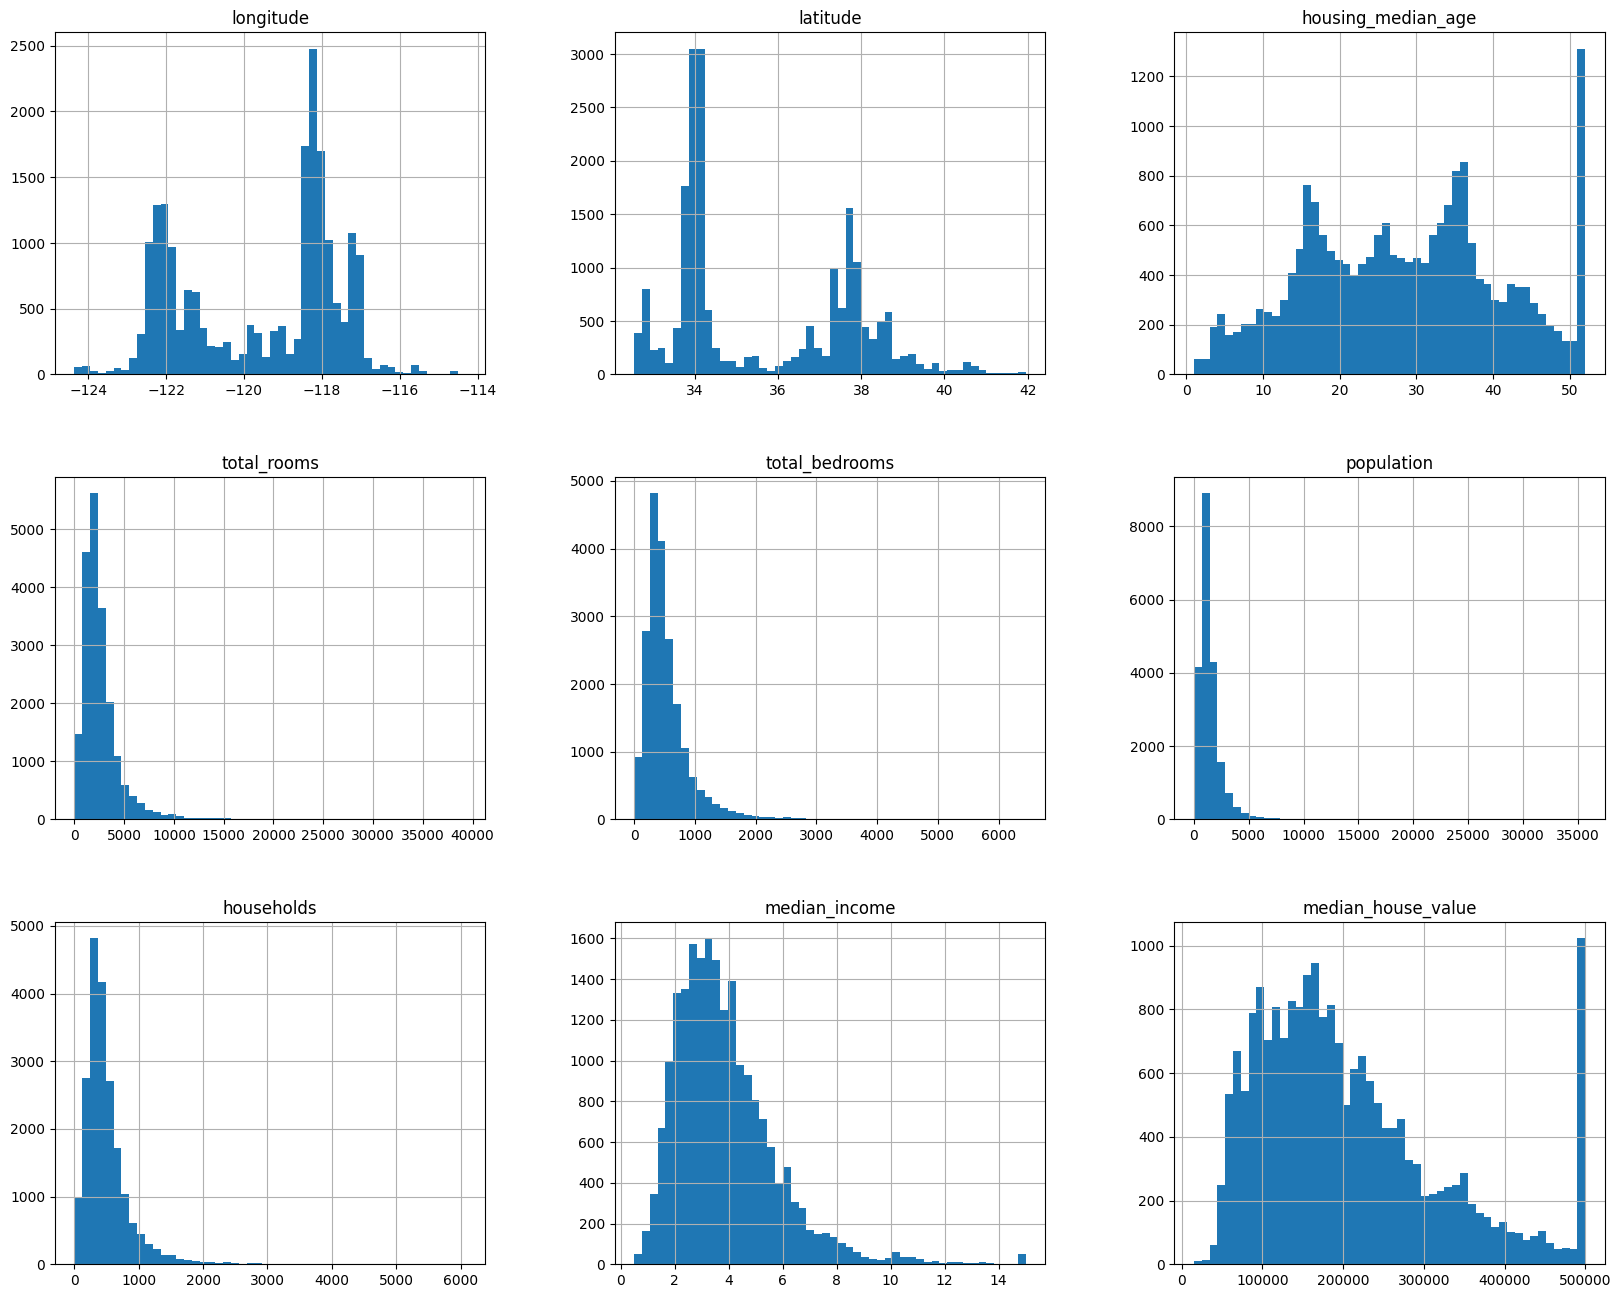

In [13]:
housing.hist(bins = 50, figsize=(20,16))
plt.show()

From the above Histograms:
1. We see that the graph for longitude and latitude is Bimodal(or multimodal) distribution. For longitide, it has 2 peaks with one mean at -122 and other at -118. For latitude, the mean is at 34 and 38

2. For housing median age, the graph seems to be multimodal distribution. It is evident that it has three modes and we can ifer that there are few houses which are new and many of the houses are bulit 50 years ago compared to others. 

3. Distribution for total_rooms, total_bedrooms,population and households are normal distribution which are rightly skewed. The peak at every distribution tells us about the highest occurences at that point. From the distribution, it appears that there is a co-relation between total rooms, bedrooms, population and household, however, we will verify the same with corelation materix going forward. Generally speaking, we can say that more rooms in a block will have more bedrooms and hence more people living there, increasing the block's population.

4. For Median_income and median house value, the graph is normally distributed. Here, for median house value we see more occurences with house price 500000, showing highest peak at the right tail end.

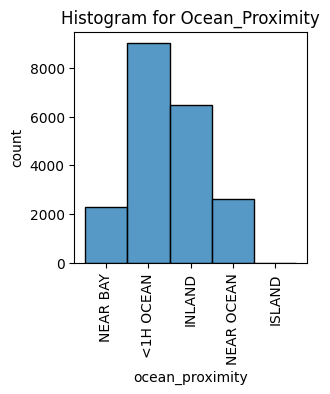

In [14]:
plt.subplots(figsize = (3,3))
sns.histplot(cat['ocean_proximity'])
plt.xlabel('ocean_proximity')
plt.ylabel('count')
plt.title('Histogram for Ocean_Proximity')
plt.xticks(rotation =90)
plt.show()

From this graph, we see that ocean_proximity is normally distributed. 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


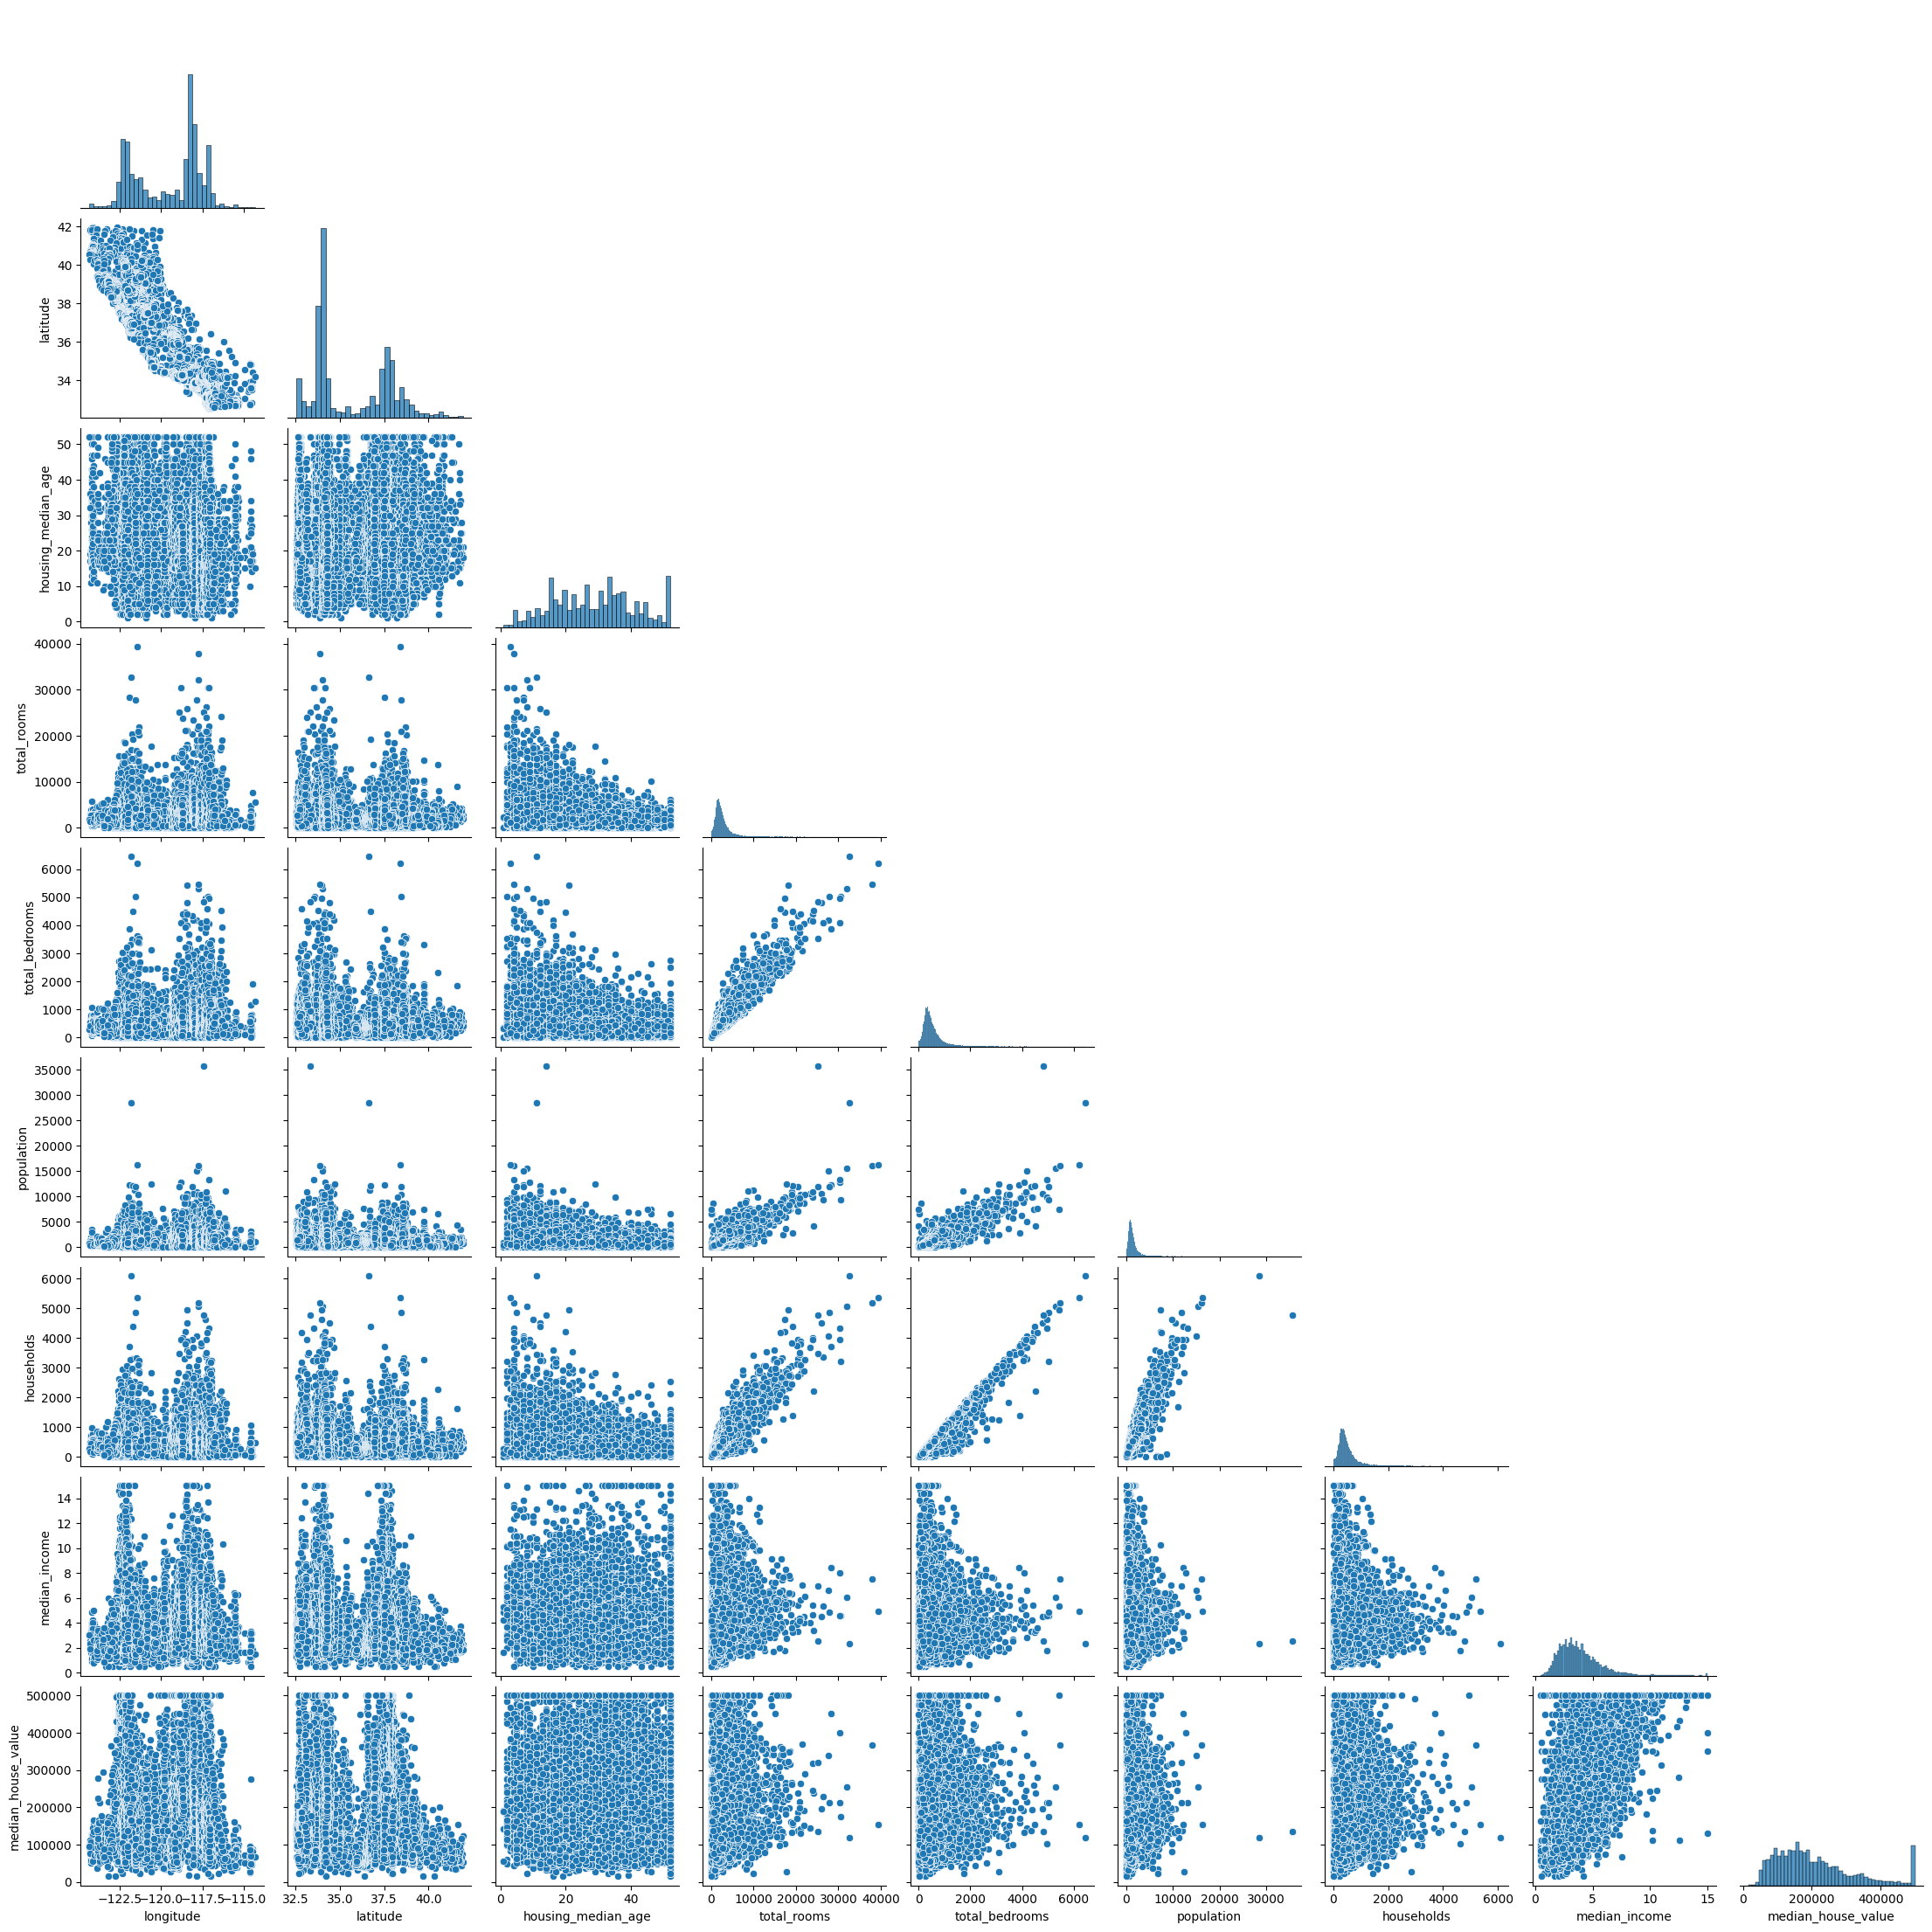

In [15]:
# to compare the pair plots
sns.pairplot(housing, corner = True)
plt.show()

From the above pair plot, we see that 
1. Median_house value is positively co-related to median income, however, there are outliers present
2. Also, we see a positive strong corelation between total_bedrooms, population,total_rooms and households with each other
3. If we look at the last row to see how median house value is related to all other features, we see that median income is positively corelated to it. Also, we can observe that there are outliers present in total_rooms, total_bedrooms,population, households and median income.

Let us draw sns pairplot with respect to ocean proximity

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


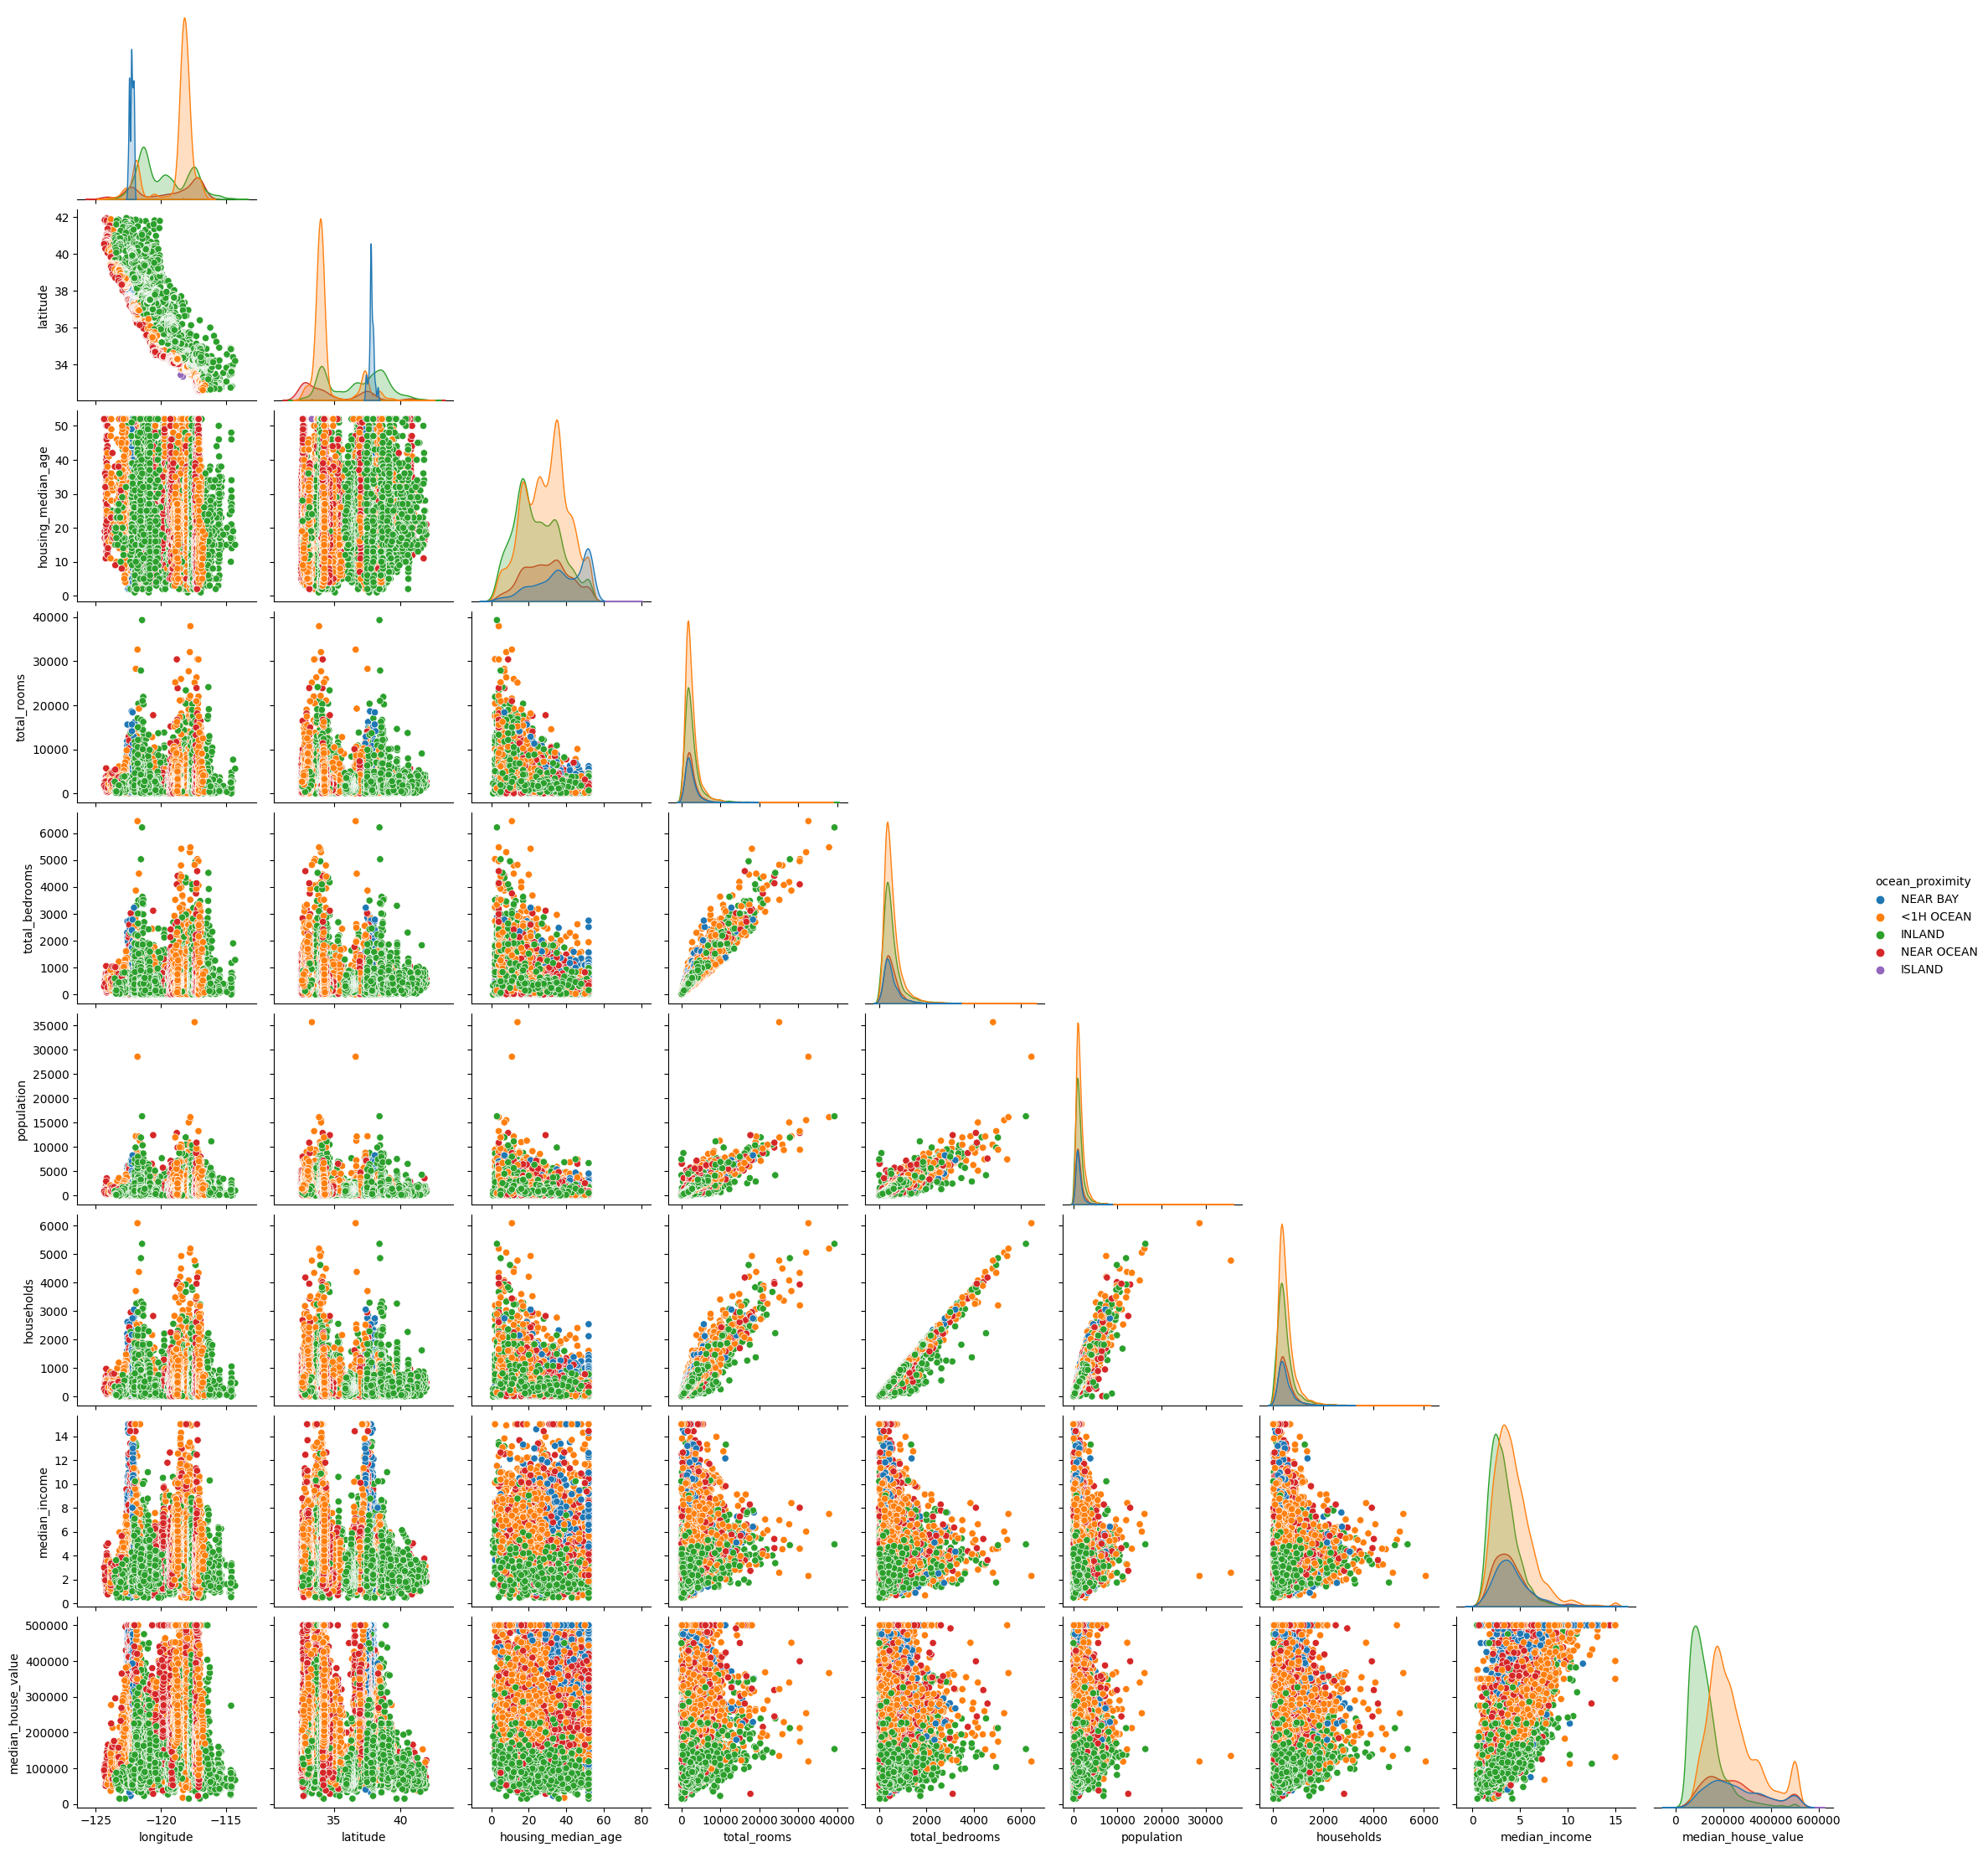

In [16]:
sns.pairplot(housing, hue = 'ocean_proximity', corner = True)

From above, it appears that maximum median income families live away from <1H ocean.

For outliers and relation with ocean proximity for features like bedroom, rooms, median income, median house value, population and households, lets draw box plot for better insights

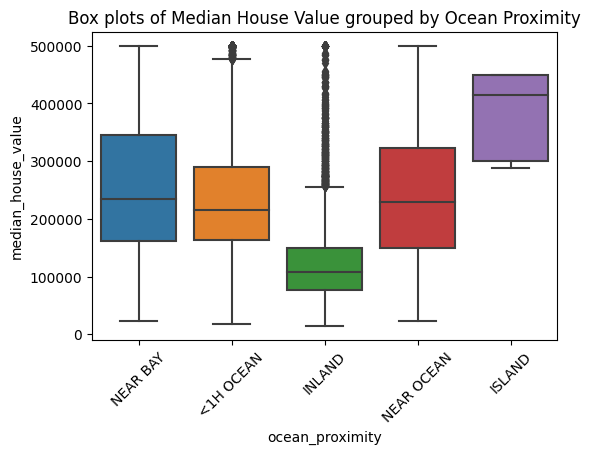

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=housing['ocean_proximity'], y= housing['median_house_value'])
plt.title('Box plots of Median House Value grouped by Ocean Proximity')
plt.xticks(rotation=45)
plt.show()

With this boxplot, we can infer that 
1. hight outliers are present for category Inland and low for <1H ocean wrt median house value. 
2. Aslo, we see that median house value for homes at island are costlier and median value for homes at inland has low proces compared to the rest 3 categories. 

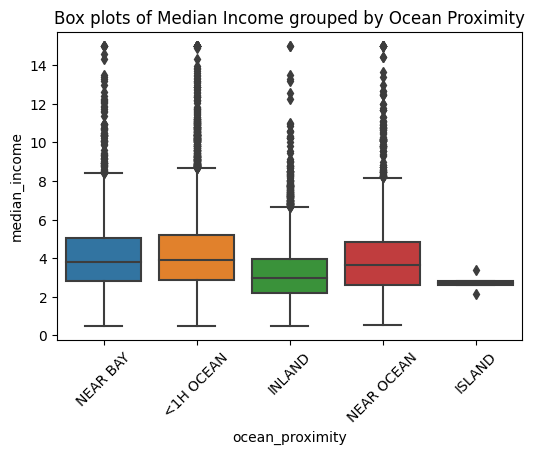

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=housing['ocean_proximity'], y= housing['median_income'])
plt.title('Box plots of Median Income grouped by Ocean Proximity')
plt.xticks(rotation=45)
plt.show()

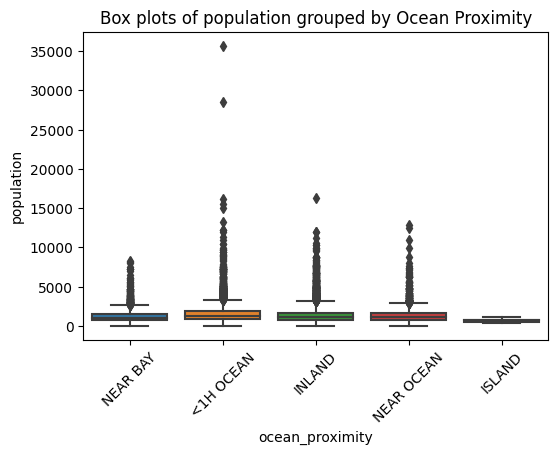

In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=housing['ocean_proximity'], y= housing['population'])
plt.title('Box plots of population grouped by Ocean Proximity')
plt.xticks(rotation=45)
plt.show()

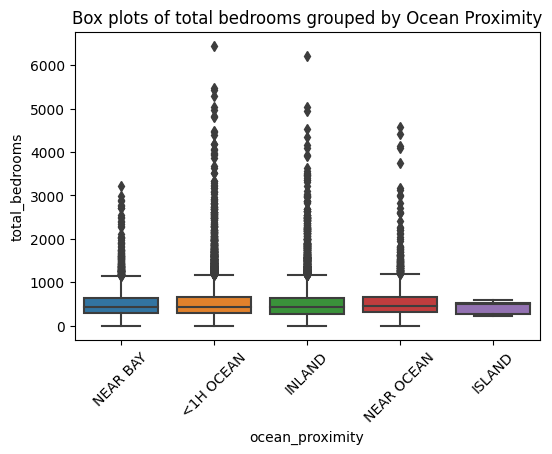

In [20]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=housing['ocean_proximity'], y= housing['total_bedrooms'])
plt.title('Box plots of total bedrooms grouped by Ocean Proximity')
plt.xticks(rotation=45)
plt.show()

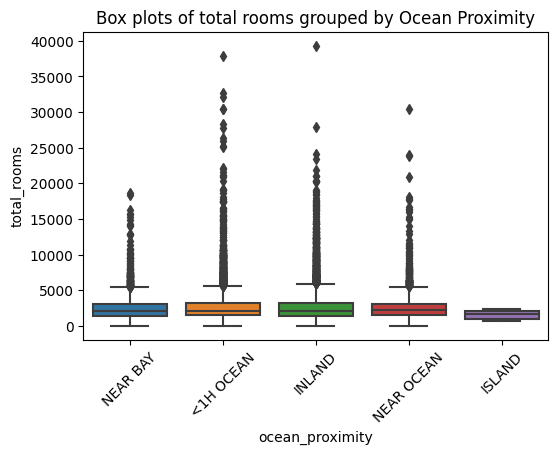

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=housing['ocean_proximity'], y= housing['total_rooms'])
plt.title('Box plots of total rooms grouped by Ocean Proximity')
plt.xticks(rotation=45)
plt.show()

When Features population, total rooms, total bedrooms, households and median income are grouped with ocean proximity, we see that outliers are present for all categories of ocean proximity except for island.

We can also check the outliers numerically by calculating the IQR interQR and then by defining the lower and upper range by  
RangeUpper = qtr3 + 1.5 * interQR
RangeLower = qtr1 - 1.5 * interQR

and considering all the values as outliers falling below and above this range. we can traet the outliers by considering the impuation techniques. However, here we need to confirm the features which are highly corelated.

### Co-relation and Covariance Matrix

In [22]:
features_to_visualize = housing.iloc[:,:-1]
corr = features_to_visualize.corr(method = 'pearson')
corr

longitude  latitude  housing_median_age  total_rooms   
longitude                1.00     -0.92               -0.11         0.05  \
latitude                -0.92      1.00                0.01        -0.04   
housing_median_age      -0.11      0.01                1.00        -0.36   
total_rooms              0.05     -0.04               -0.36         1.00   
total_bedrooms           0.07     -0.07               -0.32         0.93   
population               0.10     -0.11               -0.30         0.86   
households               0.06     -0.07               -0.30         0.92   
median_income           -0.02     -0.08               -0.12         0.20   
median_house_value      -0.05     -0.14                0.11         0.13   

                    total_bedrooms  population  households  median_income   
longitude                     0.07        0.10        0.06          -0.02  \
latitude                     -0.07       -0.11       -0.07          -0.08   
housing_median_age           -0.32       -0.30       -0.30          -0.12   
total_rooms                   0.93        0.86        0.92           0.20   
total_bedrooms                1.00        0.88        0.98          -0.01   
population                    0.88        1.00        0.91           0.01   
households                    0.98        0.91        1.00           0.01   
median_income                -0.01        0.01        0.01           1.00   
median_house_value            0.05       -0.03        0.06           0.69   

                    median_house_value  
longitude                        -0.05  
latitude                         -0.14  
housing_median_age                0.11  
total_rooms                       0.13  
total_bedrooms                    0.05  
population                       -0.03  
households                        0.06  
median_income                     0.69  
median_house_value                1.00

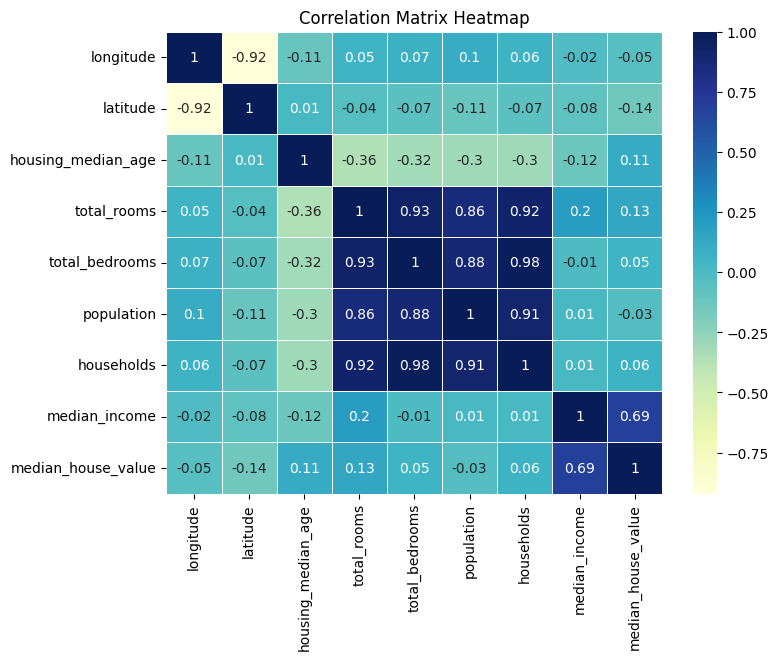

In [23]:
#Plotting correlation matrix
correlation_matrix = features_to_visualize.corr().round(2)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap ='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Covariance

In [24]:
features_to_visualize.cov()

longitude  latitude  housing_median_age  total_rooms   
longitude                4.01     -3.96               -2.76       199.13  \
latitude                -3.96      4.56                0.32      -171.18   
housing_median_age      -2.76      0.32              158.55     -9923.22   
total_rooms            199.13   -171.18            -9923.22   4775403.08   
total_bedrooms          58.77    -60.30            -1700.31    856730.63   
population             227.66   -263.87            -4220.63   2122942.16   
households              43.29    -58.62            -1457.48    767750.22   
median_income           -0.06     -0.32               -2.83       821.30   
median_house_value  -10499.90 -35669.33           154703.60  33624518.56   

                    total_bedrooms  population  households  median_income   
longitude                    58.77      227.66       43.29          -0.06  \
latitude                    -60.30     -263.87      -58.62          -0.32   
housing_median_age        -1700.31    -4220.63    -1457.48          -2.83   
total_rooms              856730.63  2122942.16   767750.22         821.30   
total_bedrooms           177565.38   419139.11   157829.51          -6.18   
population               419139.11  1284161.48   393015.37          10.95   
households               157829.51   393015.37   146152.70           9.75   
median_income                -6.18       10.95        9.75           3.61   
median_house_value      2416878.24 -3309525.73  2863815.04      150919.15   

                    median_house_value  
longitude                    -10499.90  
latitude                     -35669.33  
housing_median_age           154703.60  
total_rooms                33624518.56  
total_bedrooms              2416878.24  
population                 -3309525.73  
households                  2863815.04  
median_income                150919.15  
median_house_value      13325393238.50

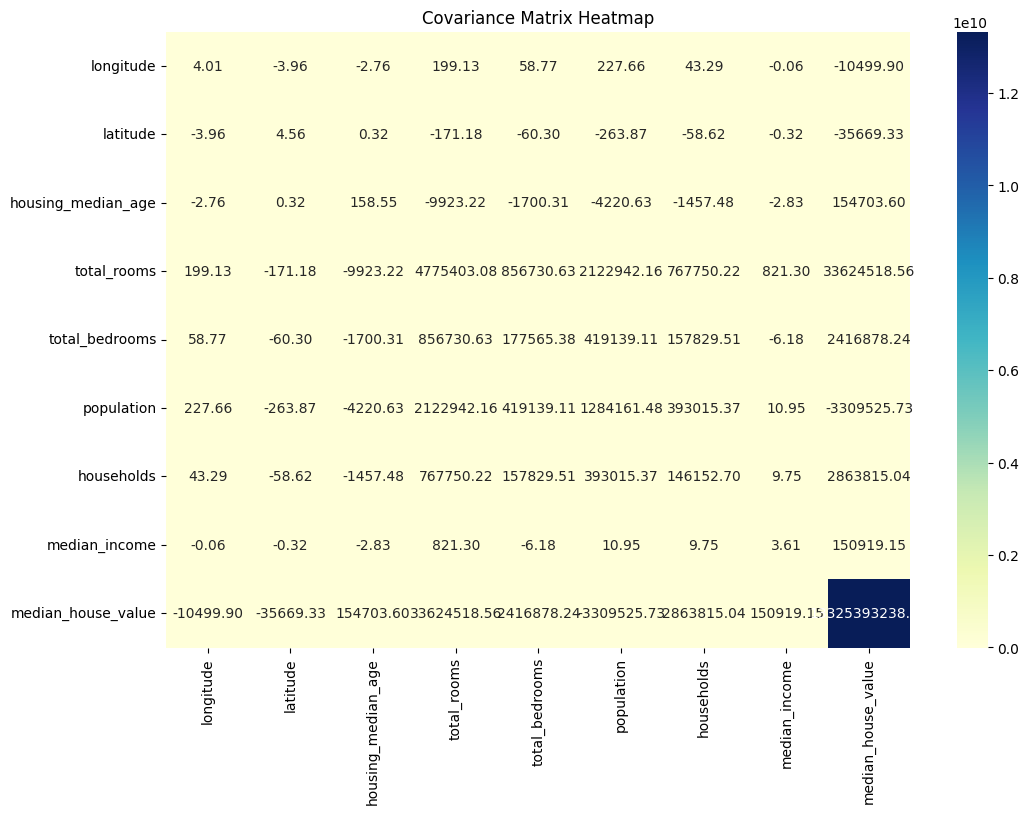

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(features_to_visualize.cov(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Covariance Matrix Heatmap")
plt.show()

From above matrix, it is inferred that,
1. Corelation Matrix: There is a strong co relations between 
`a.` total_rooms with total bedrooms, no.is 0.93
`b.` totals bedrooms with households(0.98), 
`c.` households with total rooms (0.92), 
`d.` households with population(0.91),
`e.` population with total bedrroms(0.88), 
`f.` population with total rooms(0.86).

2. It also appears from corelation matrix that median house value is strongly corelated with median Income, o.68 which is higher as compared to all other features with median house value.

3. Covariance Matrix: it is evident that median house value has negative relation with population, however it shows very strong relation with median income. Look at the intensity of color signifying the same.

#### Summary:

1. We found out that there are 20640 rows and 10 features for this dataset. All the features are contionuous except the "ocean_proximity" which is categorical.

2. From Describe feature: we observe that there is point which has value 0. However, from this table it is also seen that high no.of rooms and bedrooms are given. Since the description of dataset is not provided, we can assume that the dataset is for a particular county/Zip, given the population, total rooms, bedrooms, housholds no. Also, we see that median income is arrived with sort of factor as max 15.00 and low 0.50 is not clear what it means. The target value is median house value in that particular location.

3. Method Info tells us that feature total_bedrooms has 207 missing data points, also note that all the data types are float and only ocean_proximity is object. The Target feature is "Median House Value" and rest all are the features of this dataset

4. The percentage of missing values is very low, i.e 1.002% (207 out of 20640), hence we can opt to drop these values

5. From the pair plot, we see that 
    1. Median_house value is positively co-related to median income, however, there are outliers present
    2. Also, we see a positive strong corelation between total_bedrooms, population,total_rooms and households with each other
    3. If we look at the last row to see how median house value is related to all other features, we see that median income is positively corelated to it. Also, we can observe that there are outliers present in total_rooms, total_bedrooms,population, households and median income.

6. From sns plot with ocean proximity, it appears that maximum median income families live away from <1H ocean.

7. From boxplot of Median House Value grouped with ocean proximity, we can infer that 
    1. hight outliers are present for category Inland and low for <1H ocean wrt median house value. 
    2. Aslo, we see that median house value for homes at island are costlier and median value for homes at inland has low proces compared to the rest 3 categories. 

8. From box plot of other features grouped with ocean proximity: When Features population, total rooms, total bedrooms, households and median income are grouped with ocean proximity, we see that outliers are present for all categories of ocean proximity except for island.

9. We can also check the outliers numerically by calculating the IQR interQR and then by defining the lower and upper range by  
RangeUpper = qtr3 + 1.5 * interQR
RangeLower = qtr1 - 1.5 * interQR

and considering all the values as outliers falling below and above this range. we can traet the outliers by considering the impuation techniques. However, here we need to confirm the features which are highly corelated.

10. From corelation and covariance matrix, it is inferred that,
    1. Corelation Matrix: There is a strong co relations between 
            `a.` total_rooms with total bedrooms, no.is 0.93
            `b.` totals bedrooms with households(0.98), 
            `c.` households with total rooms (0.92), 
            `d.` households with population(0.91),
            `e.` population with total bedrroms(0.88), 
            `f.` population with total rooms(0.86).

    2. It also appears from corelation matrix that median house value is strongly corelated with median Income, o.68 which is higher as compared to all other features with median house value.

    3. Covariance Matrix: it is evident that median house value has negative relation with population, however it shows very strong relation with median income. 

### Thank You!!